# Graph Signal Processing
This notebook contains both the original lab as well as the assignement. Please scroll down to the end to see the assignment. 

*Mrinank Sharma*

In [28]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting

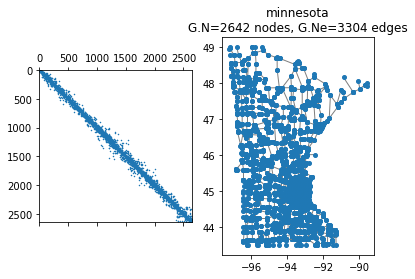

In [29]:
G = graphs.Minnesota()
G.coords.shape # coordinates are already set for nodes for visualisation
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(G.W, markersize=0.5) # visualise the adjacency matrix in a spy plot
G.plot(ax=axes[1]) # visualise the graph in 2D coordinates

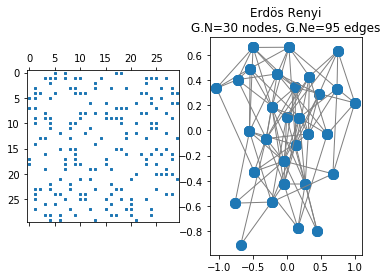

In [30]:
G = graphs.ErdosRenyi(N=30, p=0.2)
G.set_coordinates(kind="spring") # set coordinates for nodes for visualisation
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(G.W, markersize=2)
G.plot(ax=axes[1])

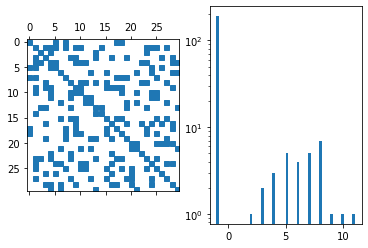

In [31]:
G.compute_laplacian("combinatorial")
fig, axes = plt.subplots(1, 2)
axes[0].spy(G.L, markersize=5)
axes[1].hist(G.L.data, bins=50, log=True);

$\mathbf{L}$ has additional non-zero elements on the leading diagonal, due to the degree of each node.

The entries of $\mathbf{L}$ are mostly zero, indicating no connection between the vertices. **Note however that this is not shown on the above plot**. The most common element is $-1$, presumably as many nodes only have one connection. 

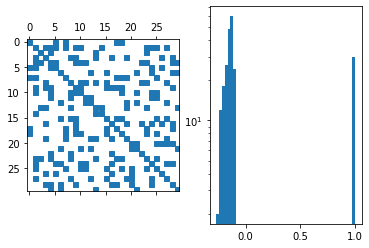

In [32]:
G.compute_laplacian("normalized")
fig, axes = plt.subplots(1, 2)
axes[0].spy(G.L, markersize=5)
axes[1].hist(G.L.data, bins=50, log=True);

The normalised laplacian is normalised by the root of the product of vertex degrees. As a result, the diagonal elements are always one, resulting in the peak at this value. 

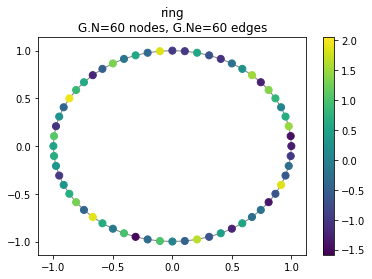

In [33]:
G = graphs.Ring(N=60)
f = np.random.normal(size=G.N)
G.plot_signal(f, vertex_size=50)

Smoothness 127.068 Smoothness Sorted 12.425
Smaller is smoother



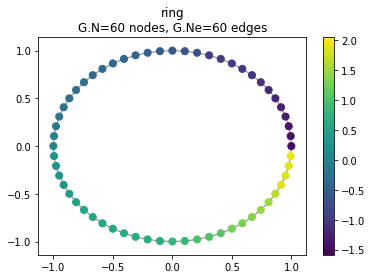

In [34]:
G.compute_laplacian("combinatorial")
smoothness = np.transpose(f) @ G.L @ f
f_sorted = np.sort(f)
smoothness_sorted = np.transpose(f_sorted) @ G.L @ f_sorted
print(f"Smoothness {smoothness:.3f} Smoothness Sorted {smoothness_sorted:.3f}\nSmaller is smoother\n");
G.plot_signal(f_sorted, vertex_size=50)

As expected, sorting the signal values increases the smoothness. This is because the vertices are in a ring, and thus sorting effectively minimises the differences in the value for each node and its neighbour. This can be seen on the above graph.

For a general graph, this will probably not work, as the structure (and labelling) may be more complex. For example, randomising the indices of the graph would lead to each draw being effectively random, and thus no expected change really. 

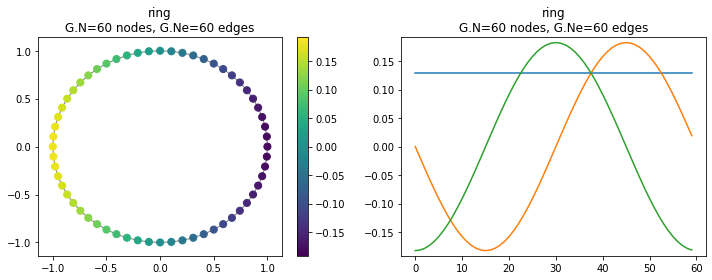

In [35]:
G.compute_fourier_basis()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(G.U[:, 2], vertex_size=50, ax=axes[0]) # the 3rd eigenvector as a signal on the graph
G.set_coordinates("line1D")
G.plot_signal(G.U[:, 0:3], ax=axes[1]) # the first three eigenvectors on the real line
fig.tight_layout()

The fourier basis appears to be a DC component, as well as (negative) sine and cosine waves, which is very similar to the canonical fourier series analysis. 

[0.         0.09788697 0.09788697 0.19577393 0.38196601]


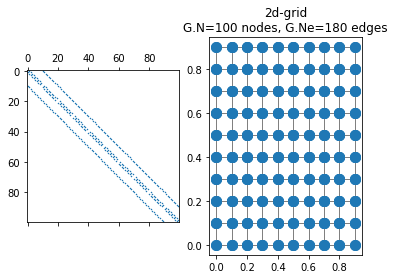

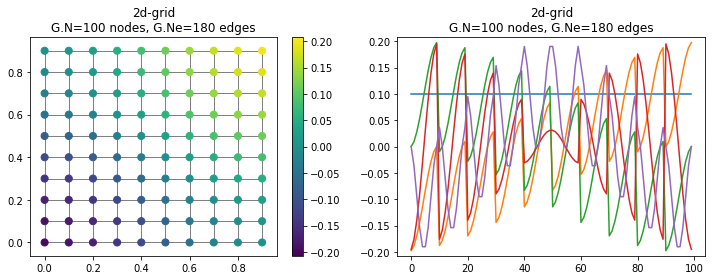

In [36]:
G = graphs.Grid2d(10, 10)
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(G.W, markersize=0.5) # visualise the adjacency matrix in a spy plot
G.plot(ax=axes[1]) # visualise the graph in 2D coordinates

G.compute_fourier_basis()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(G.U[:, 2], vertex_size=50, ax=axes[0]) # the 3rd eigenvector as a signal on the graph
G.set_coordinates("line1D")
G.plot_signal(G.U[:, 0:5], ax=axes[1]) # the first three eigenvectors on the real line
print(f"{G.e[0:5]}")
fig.tight_layout()

[0.         0.00084373 0.00207582 0.00226481 0.00312358]


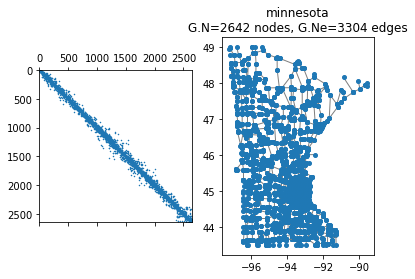

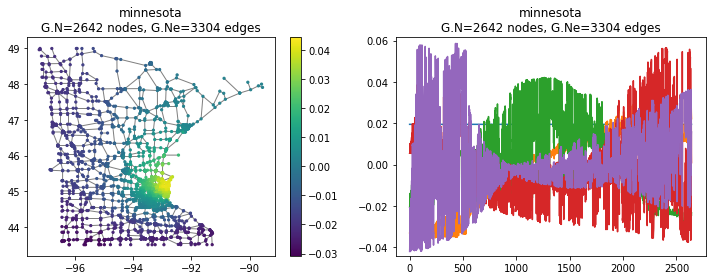

In [37]:
G = graphs.Minnesota()
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(G.W, markersize=0.5) # visualise the adjacency matrix in a spy plot
G.plot(ax=axes[1]) # visualise the graph in 2D coordinates

G.compute_fourier_basis()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(G.U[:, 2], vertex_size=5, ax=axes[0]) # the 3rd eigenvector as a signal on the graph
G.set_coordinates("line1D")
G.plot_signal(G.U[:, 0:5], ax=axes[1]) # the first three eigenvectors on the real line
print(f"{G.e[0:5]}")
fig.tight_layout()

# Comments
Note that we cannot compare the eigenvalues across the graphs. The values are increasing in order, due to the way that the eigendecomposition has been set up. 

2019-10-28 14:44:57,328:[INFO](pygsp.graphs.community.__init__): Constructed using eps-NN with eps = 2.5900200641113513


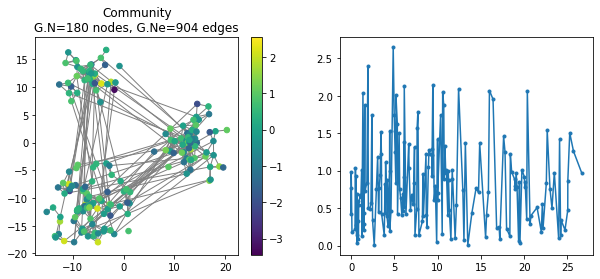

In [38]:
communities = [40, 80, 60]
G = graphs.Community(N=180, Nc=3, comm_sizes=communities)
f = np.random.normal(size=G.N)
G.compute_fourier_basis()
f_hat = G.gft(f)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(f, vertex_size=30, ax=axes[0])
axes[1].plot(G.e, np.abs(f_hat), ".-")

This signal has fairly large $\hat{f}$ at most frequences, and thus it is not particularly smooth. 

In [39]:
fp = np.zeros(G.N)
fp[:communities[0]] = -1*np.ones(communities[0])
fp[-communities[-1]:] = 1*np.ones(communities[-1])

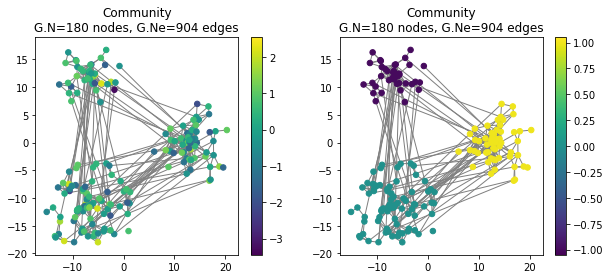

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(f, vertex_size=30, ax=axes[0])
G.plot_signal(fp, vertex_size=30, ax=axes[1])

The partitioned signal is much cleaner, and this corresponds to smoothness, as each of the communities effectively has the same value. 

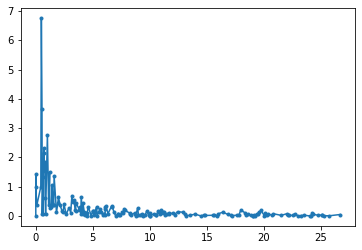

In [41]:
fp_hat = G.gft(fp)
plt.plot(G.e, np.abs(fp_hat), ".-");

Indeed, the decay in the components at high values indicates that this signal is much smoother. 

In [42]:
quad_f = (np.transpose(f) @ G.L @ f) / np.sum(np.power(f, 2))
quad_fp = (np.transpose(f_hat) @ G.L @ f_hat) / np.sum(np.power(f_hat, 2))
print(f"F {quad_f:.3f} F Partitioned {quad_fp:.3f}\nSmaller is smoother\n");

F 9.700 F Partitioned 9.934
Smaller is smoother



Indeed, it appears that $f_\text{part}$ is smoother, as seen by a lower value above. This is consisent with the fourier coefficient decomposition. 

# Part 2 of the Lab

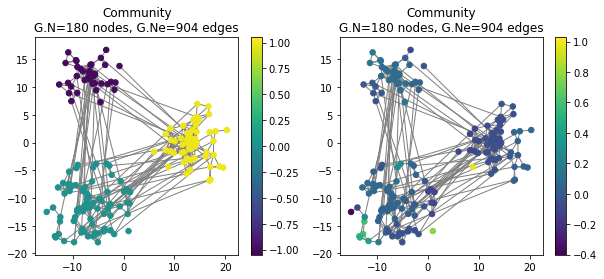

In [43]:
import copy
fb_hat = copy.deepcopy(f_hat)
fb_hat[10:] = 0 # this corresponds to an ideal brick-wall low-pass filtering
fb = G.igft(fb_hat)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(fp, vertex_size=30, ax=axes[0])
G.plot_signal(fb, vertex_size=30, ax=axes[1])

The filtered version apperas to be significantly more smooth!. Again, this is as expected. 

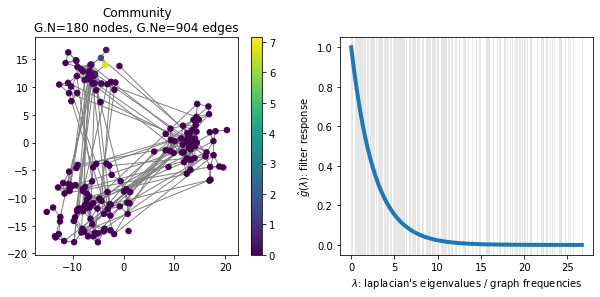

In [44]:
tau = 10
delta = 10
g = filters.Heat(G, tau) # the heat kernel defined via the graph spectral domain
s = g.localize(delta) # the heat kernel localised at a particular node in the vertex domain
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(s, vertex_size=30, ax=axes[0])
g.plot(ax=axes[1])

Note that this is simply a visualisation, seeing what the filter would do, if it were applied 

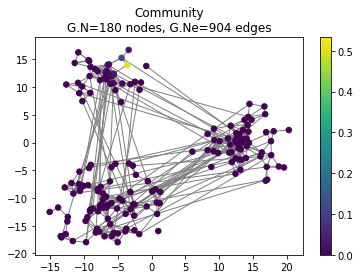

In [45]:
f_ver = np.zeros(G.N)
f_ver[delta] = 1
f_ver_filtered = g.filter(f_ver)
G.plot_signal(f_ver_filtered, vertex_size=30)

As expected, this looks the same.

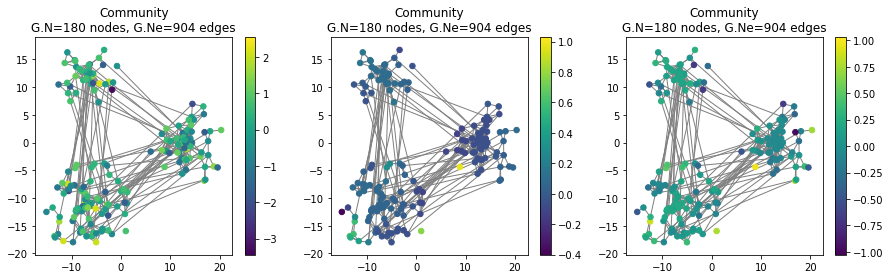

In [46]:
f_heat = g.filter(f)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
G.plot_signal(f, vertex_size=30, ax=axes[0])
G.plot_signal(fb, vertex_size=30, ax=axes[1])
G.plot_signal(f_heat, vertex_size=30, ax=axes[2])

Taking into account the different colorbar levels, the heat map filter looks less smooth, presumably becaues it doesn't block out all of the maximum frequencies. 

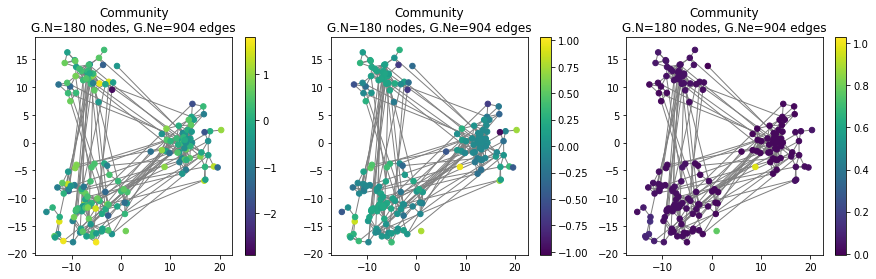

In [47]:
taus = [1, 10, 100]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, tau in enumerate(taus):
    g = filters.Heat(G, tau)
    f_heat = g.filter(f)
    G.plot_signal(f_heat, vertex_size=30, ax=axes[i])

The larger the value of $\tau$, the more smoothing is applied i.e. the lower the cutoff frequency. 

We want to solve 

$$ 
\begin{align}
\min_{\mathbf{x}\in \mathbb{R}^n} || \mathbf{y} - \mathbf{x}||_2^2 + \alpha \mathbf{x^T L x}
\end{align}
$$ 

This is equivalent to:


$$ 
\begin{align}
\min_{\mathbf{x}\in \mathbb{R}^n}  (\mathbf{y} - \mathbf{x})^T (\mathbf{y} - \mathbf{x}) + \alpha \mathbf{x^T L x}
\end{align}
$$ 

Taking matrix derivatives trivially yields:

$$ \mathbf{x} = \underbrace{(\mathbf{I} + \alpha \mathbf{L})^{-1}}_\mathbf{M} \mathbf{y} $$

Denote the eigenvalues of $\mathbf{L}$ as $\lbrace \lambda_1, \ldots, \lambda_n \rbrace$. Then, the eigenvalues of the $\mathbf{M}$ are related to the eigenvalues of $\mathbf{L}$ as follows:

$$\lambda(\mathbf{M})_i = \frac{1}{\alpha \lambda_i + 1}$$

and $\mathbf{M}$ projects to the same orthonormal basis. Thus, larger values of $\lambda$ are attenuated more, so this is a low pass filter. 

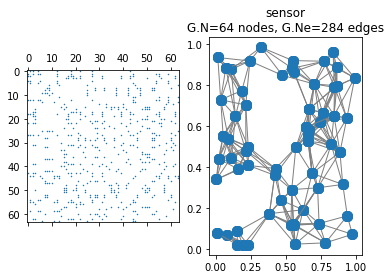

In [48]:
G = graphs.Sensor()
G.coords.shape # coordinates are already set for nodes for visualisation
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(G.W, markersize=0.5) # visualise the adjacency matrix in a spy plot
G.plot(ax=axes[1]) # visualise the graph in 2D coordinates

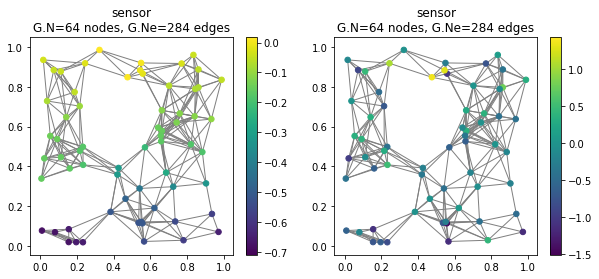

In [49]:
G.compute_laplacian("combinatorial")
G.compute_fourier_basis()

ss = np.sum([2.0, 1.5, -0.25, 0.9] * G.U[:, 0:4], axis=-1);
y = ss + np.random.normal(scale=0.5, size=G.N);
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(ss, vertex_size=30, ax=axes[0]);
G.plot_signal(y, vertex_size=30, ax=axes[1]);

As expected, this looks pretty smooth, and the noise makes it significantly less smooth. 

In [50]:
def gen_filter_alpha(alpha):
    g = filters.Filter(G, lambda x: 1. / (1. + alpha*x))
    return g

alpha: 1.00e-03 MSE: 2.575e-01
alpha: 1.00e-02 MSE: 2.295e-01
alpha: 1.00e-01 MSE: 9.953e-02
alpha: 1.00e+00 MSE: 1.049e-02
alpha: 1.00e+01 MSE: 2.692e-02
alpha: 1.00e+02 MSE: 5.997e-02


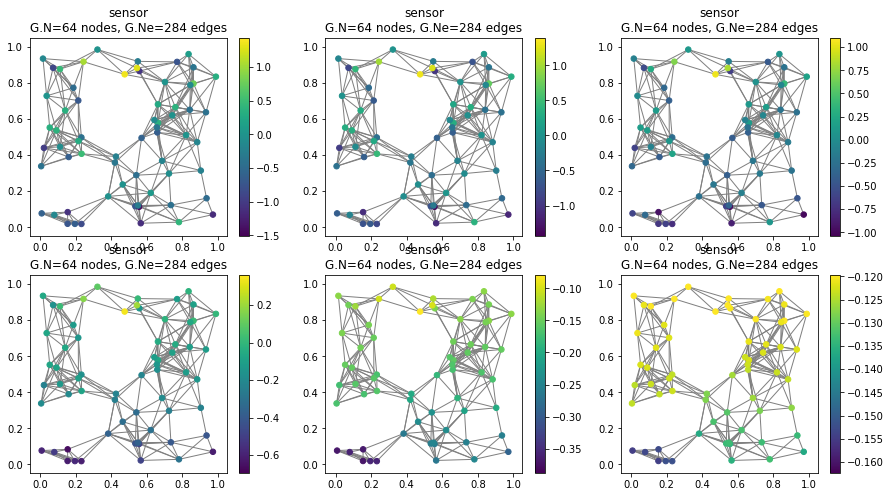

In [51]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = [*axes[0], *axes[1]]
for i, alpha in enumerate(alphas):
    g = gen_filter_alpha(alpha)
    x_hat = g.filter(y);
    MSE = np.mean(np.power(np.subtract(x_hat, ss), 2))
    print(f"alpha: {alpha:.2e} MSE: {MSE:.3e}")
    G.plot_signal(g.filter(y), vertex_size=30, ax=axes[i])

As $\alpha$ increases, the smoothness increases. 

It was a little lazy, but looking over the grid of values considered, $\alpha \simeq 1$ seems to be the best performance. 

# Assignment: Inpainting

We want to solve 

$$ 
\begin{align}
\min_{\mathbf{x}\in \mathbb{R}^n} || \mathbf{y} - \mathbf{Mx}||_2^2 + \alpha \mathbf{x^T L x}
\end{align}
$$ 

where $\mathbf{y}$ is partially observed and $\mathbf{M}$ is a diagonal, singular matrix, 

This is equivalent to:

$$ 
\begin{align}
\min_{\mathbf{x}\in \mathbb{R}^n}  \underbrace{(\mathbf{y} - \mathbf{Mx})^T (\mathbf{y} - \mathbf{Mx}) + \alpha \mathbf{x^T L x}}_{J(\mathbf{x})}
\end{align}
$$ 

$$\frac{\partial J}{\partial \mathbf{x}} = 2 \mathbf{M^TMx} - 2 \mathbf{M^Ty} + 2\alpha \mathbf{Lx}$$

Setting this derivative to $\mathbf{0}$ yields:

$$ \mathbf{x} = \underbrace{(\mathbf{M^TM} + \alpha \mathbf{L})^{-1}\mathbf{M^T} }_\mathbf{F} \mathbf{y} $$

This can be simplified as follows due to the properties of $\mathbf{M}$

$$ \mathbf{x} = \underbrace{(\mathbf{M} + \alpha \mathbf{L})^{-1}\mathbf{M} }_\mathbf{F} \mathbf{y} $$

It is unclear how to calculate the filter coefficients here, or whether this can be interpreted as a filter operation, as the matrix $\mathbf{M}$ is singular and does not have eigenvectors spanning the full space. Thus, $\mathbf{F}$ will not have a complete eigenspace. This contrasts to the previous operation, where the filter matrix had eigenvalues corresponding directly to the eigenvalues of the laplacian.

This could however be interpreted as applying some filter matrix to the partially observed image, especially as the missing values will not have an affect (due to the form of $\textbf{M}$).

So the exact question of whether this applying a filter depends on your precise definition of a filter. 

We now investigate the performance, changing $p$ (the probability of observing a specific value) and $\alpha$. Noting that the specific parts of the signal which are not observed will affect performance, we also average the performance over a number of random seeds. 

In [52]:
G.compute_laplacian("combinatorial")
G.compute_fourier_basis()
ss = np.sum([2.0, 1.5, -0.25, 0.9] * G.U[:, 0:4], axis=-1);
# rescale
ss = (ss-np.min(ss))/(np.max(ss)-np.min(ss));

from scipy.stats import bernoulli

def compute_performance(ss, p, alpha, G, N_seeds = 10):
    MSE = 0
    for i in range(N_seeds):
        observed_indxs = bernoulli.rvs(p, size=G.N)
        observed_values = ss * observed_indxs
        M = np.diag(observed_indxs)
        A = M + (alpha * G.L)
        b = M @ observed_values
        x = np.linalg.solve(A, b)
        MSE = MSE +  np.mean(np.power(np.subtract(x, ss), 2))
    return MSE/N_seeds

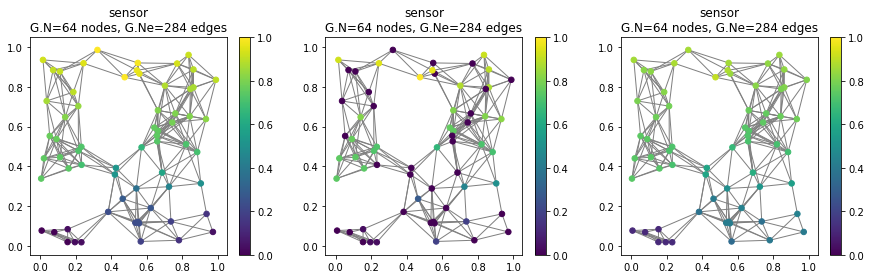

In [53]:
observed_indxs = bernoulli.rvs(0.5, size=G.N)
observed_values = ss * observed_indxs
alpha = 0.5;
M = np.diag(observed_indxs)
A = M + (alpha * G.L)
b = M @ observed_values
x_recon = np.linalg.solve(A, b)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
G.plot_signal(ss, vertex_size=30, ax=axes[0], limits=[0.0, 1.0]);
G.plot_signal(observed_values, vertex_size=30, ax=axes[1], limits=[0.0, 1.0]);
G.plot_signal(x_recon, vertex_size=30, ax=axes[2], limits=[0.0, 1.0]);

In [55]:
N_grid = 40
alphas = np.logspace(-1, 2, N_grid)
ps = np.linspace(0.05, 0.9999, N_grid)

MSE_mat = np.zeros((N_grid, N_grid))

for i, alpha in enumerate(alphas):
    for j, p in enumerate(ps):
        MSE_mat[i, j] = compute_performance(ss, p, alpha, G)

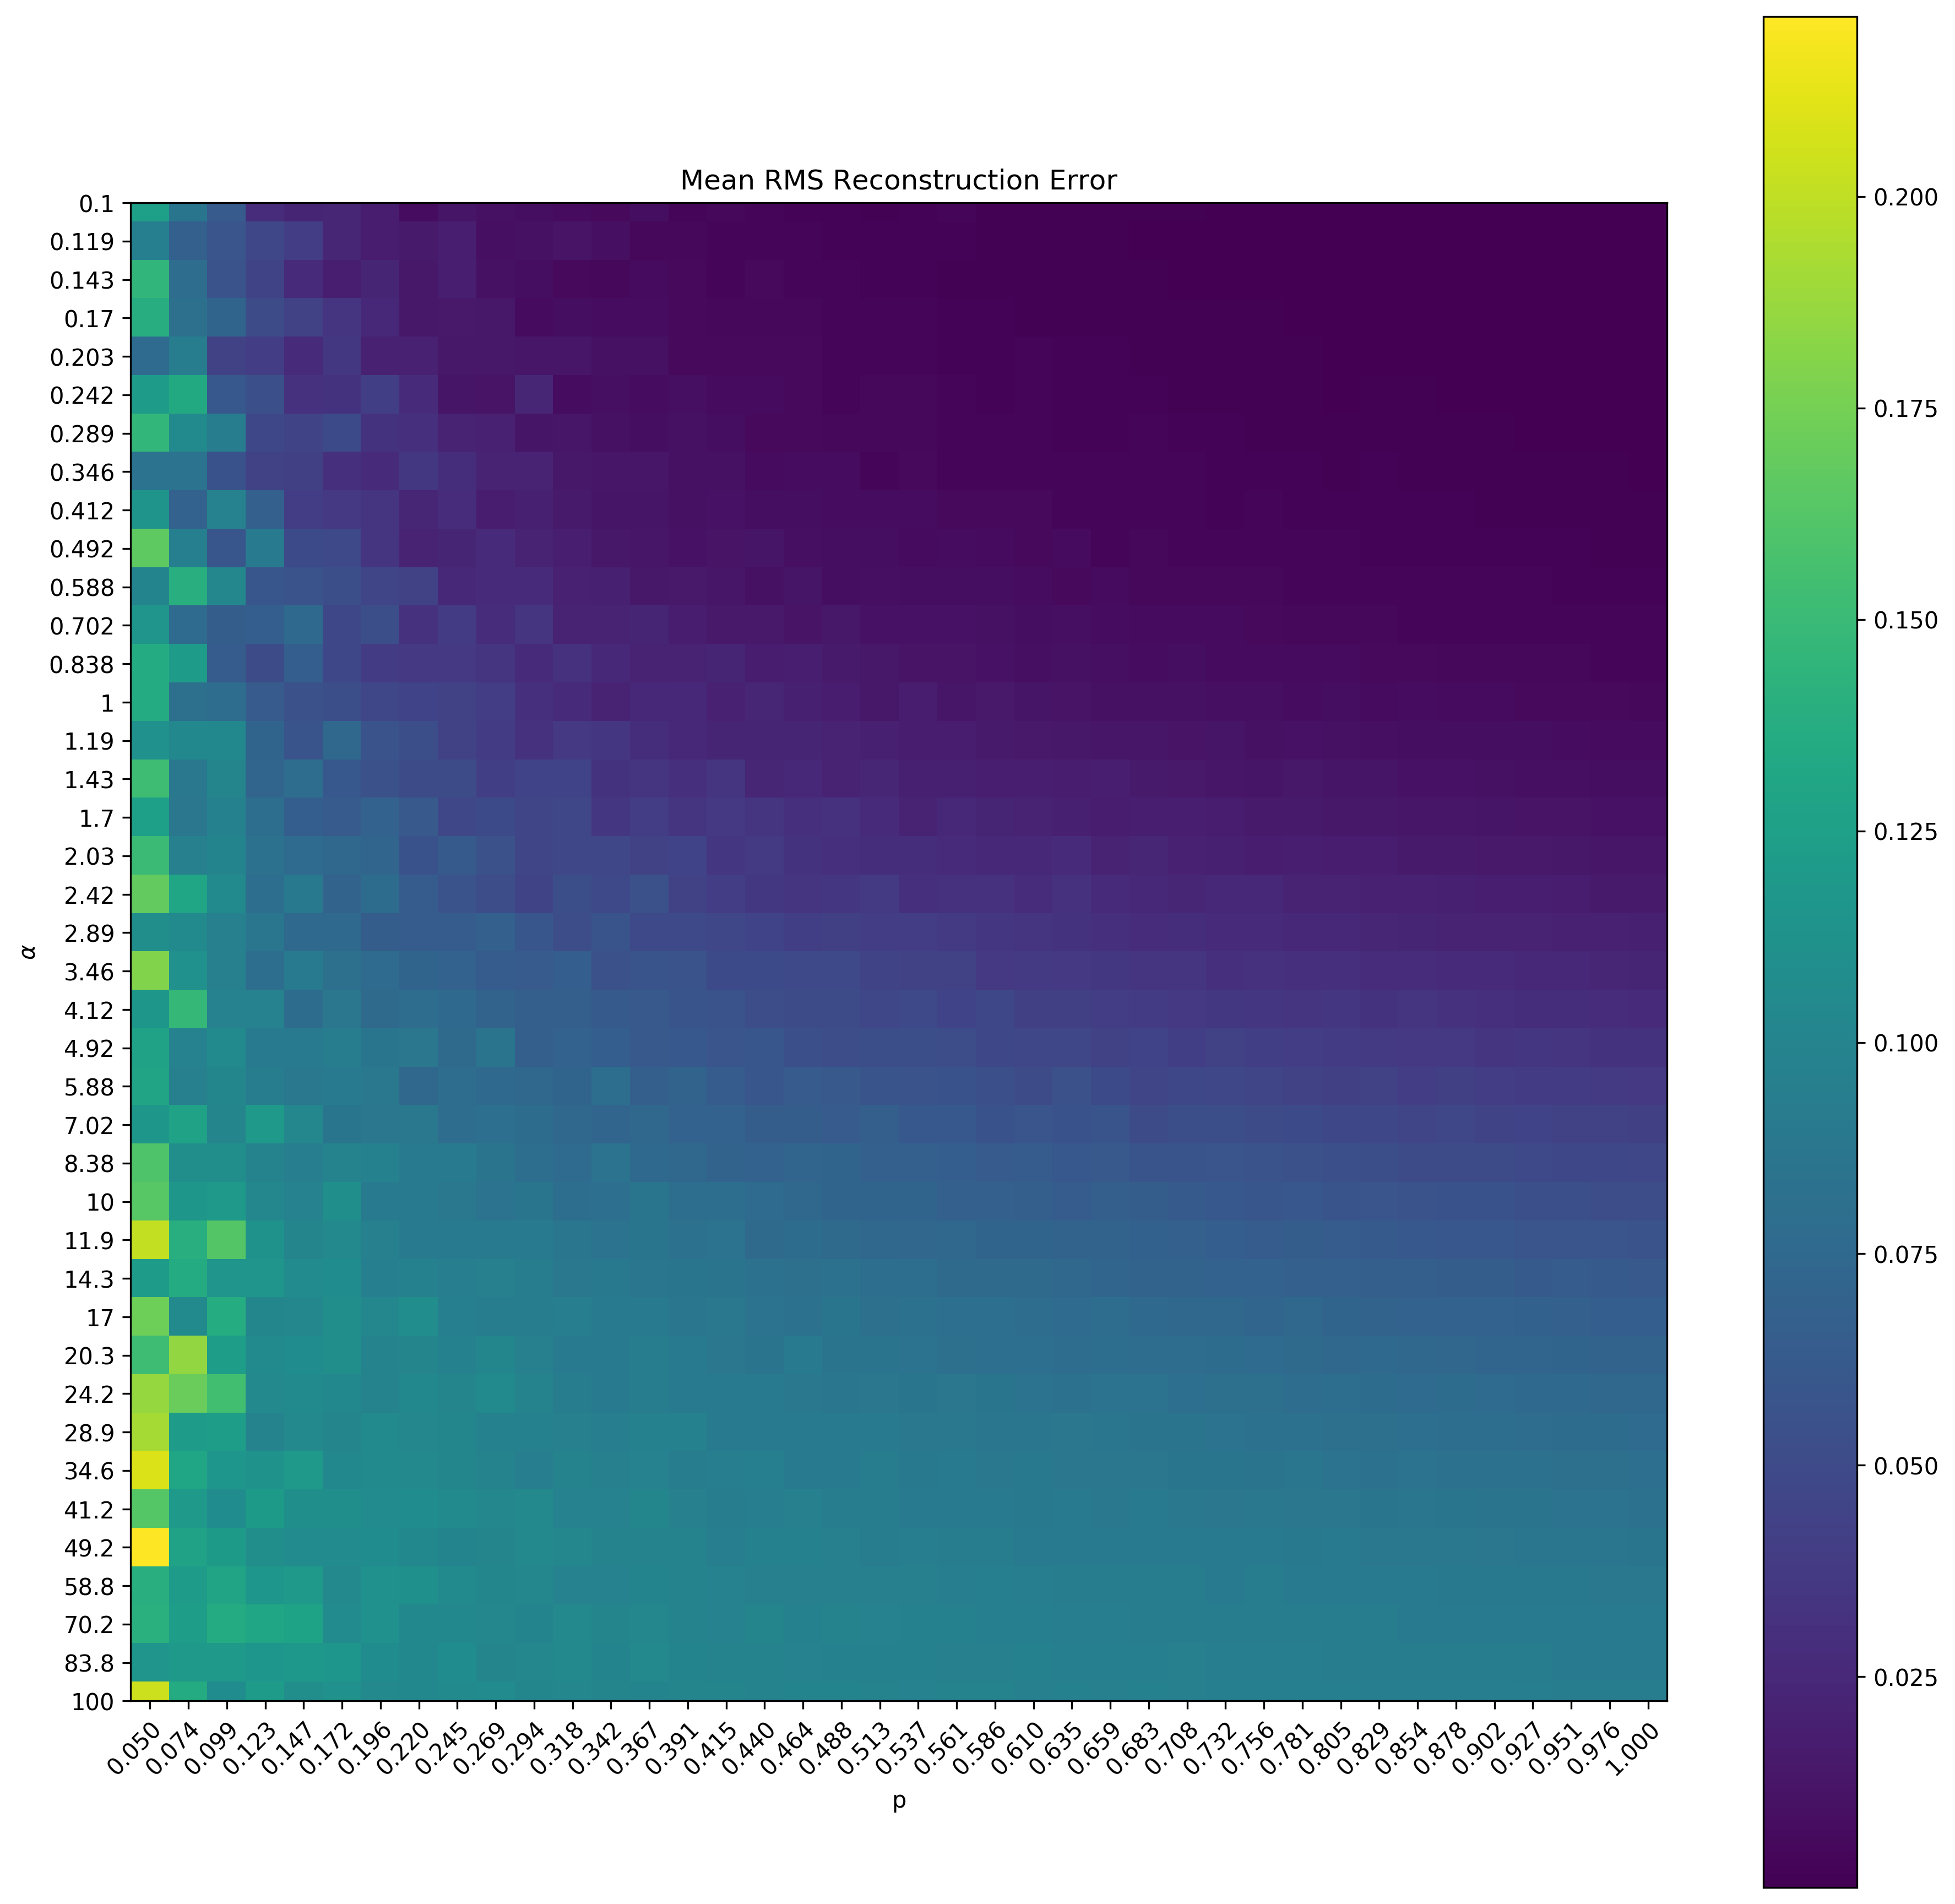

In [56]:
plt.figure(figsize=(15, 15), dpi=300)
ax = plt.gca()
im = plt.imshow(MSE_mat)
ax.set_xticks(np.arange(len(ps)))
ax.set_yticks(np.arange(len(alphas)))
ax.set_xticklabels([f"{(p):.3f}" for p in ps])
plt.colorbar();
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor");
ax.set_xlabel("p");
ax.set_yticklabels([f"{a:.3g}" for a in alphas])
ax.set_ylabel(r'$\alpha$')
plt.title("Mean RMS Reconstruction Error");

Roughly looking above, when $p>\sim 0.65$ i.e. more than $65\%$ is missing the reconstruction performance seems to take a hit. Let's look into some different values... 

# $\alpha = 0.01$

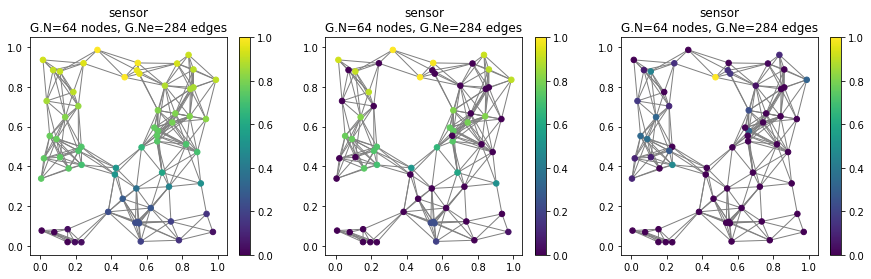

In [57]:
observed_indxs = bernoulli.rvs(0.5, size=G.N)
observed_values = ss * observed_indxs
alpha = 0.01;
M = np.diag(observed_indxs)
A = M + (alpha * G.L)
b = M @ y
x_recon = np.linalg.solve(A, b)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
G.plot_signal(ss, vertex_size=30, ax=axes[0], limits=[0.0, 1.0]);
G.plot_signal(observed_values, vertex_size=30, ax=axes[1], limits=[0.0, 1.0]);
G.plot_signal(x_recon, vertex_size=30, ax=axes[2], limits=[0.0, 1.0]);

# $\alpha = 100$

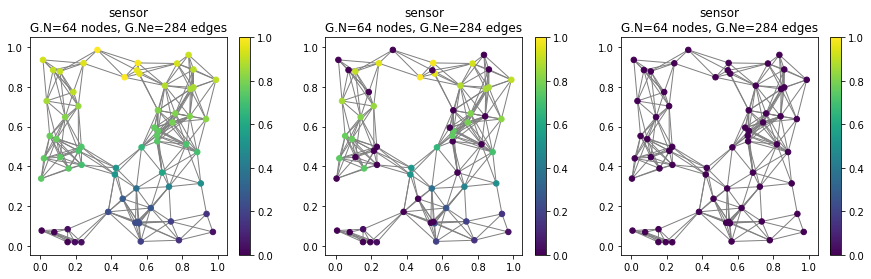

In [58]:
observed_indxs = bernoulli.rvs(0.5, size=G.N)
observed_values = ss * observed_indxs
alpha = 100;
M = np.diag(observed_indxs)
A = M + (alpha * G.L)
b = M @ y
x_recon = np.linalg.solve(A, b)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
G.plot_signal(ss, vertex_size=30, ax=axes[0], limits=[0.0, 1.0]);
G.plot_signal(observed_values, vertex_size=30, ax=axes[1], limits=[0.0, 1.0]);
G.plot_signal(x_recon, vertex_size=30, ax=axes[2], limits=[0.0, 1.0]);

The larger the value of $\alpha$, the larger the prior assumption on the smoothness of the graph values. As seen above, with large alpha, the graph is very smooth, but too small alpha does not smooth enough. 

## Standard Test Image

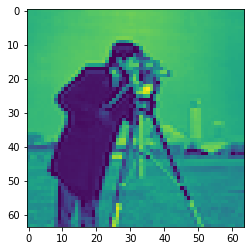

In [59]:
import imageio
img = imageio.imread('cameraman64.png')
plt.imshow(img);

ss = np.reshape(img, len(img) * len(img))

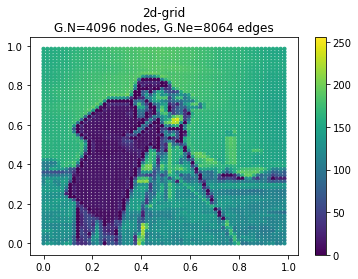

In [60]:
G = graphs.Grid2d(64, 64)
G.plot_signal(ss, vertex_size=10);

Nice, the signal shows up properly!

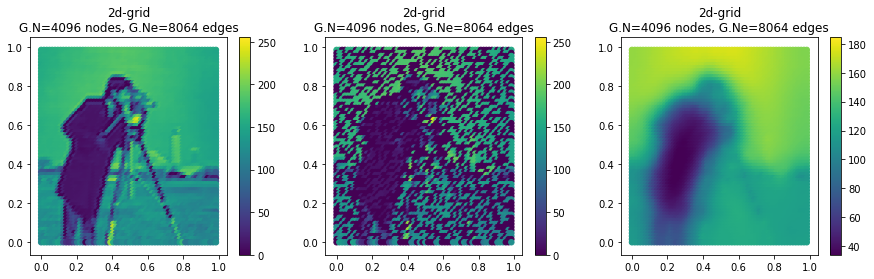

In [61]:
observed_indxs = bernoulli.rvs(0.5, size=G.N)
observed_values = ss * observed_indxs
alpha = 10;
M = np.diag(observed_indxs)
A = M + (alpha * G.L)
b = M @ observed_values
x_recon = np.linalg.solve(A, b)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
G.plot_signal(ss, vertex_size=30, ax=axes[0]);
G.plot_signal(observed_values, vertex_size=30, ax=axes[1]);
G.plot_signal(x_recon, vertex_size=30, ax=axes[2]);

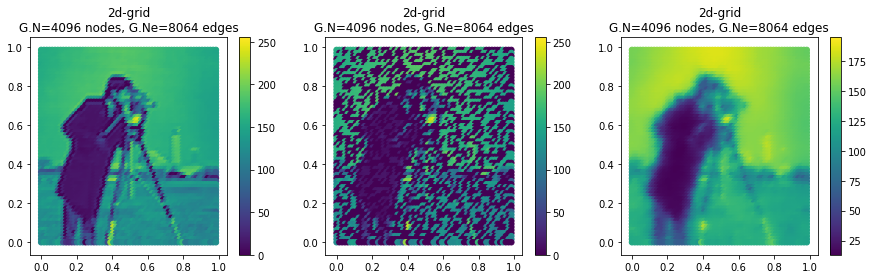

In [62]:
# looks like alpha is too strong here, let's try a new value!
observed_indxs = bernoulli.rvs(0.5, size=G.N)
observed_values = ss * observed_indxs
alpha = 1;
M = np.diag(observed_indxs)
A = M + (alpha * G.L)
b = M @ observed_values
x_recon = np.linalg.solve(A, b)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
G.plot_signal(ss, vertex_size=30, ax=axes[0]);
G.plot_signal(observed_values, vertex_size=30, ax=axes[1]);
G.plot_signal(x_recon, vertex_size=30, ax=axes[2]);

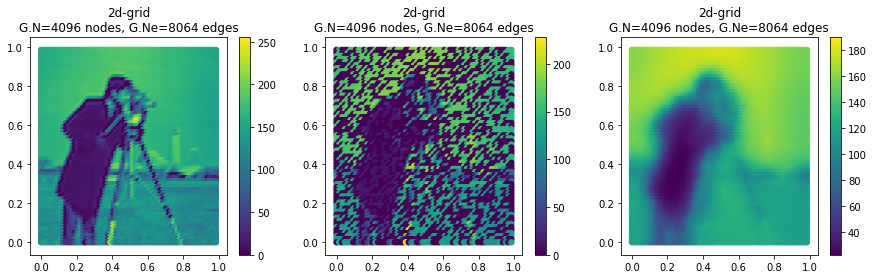

In [63]:
# looks like alpha is too strong here, let's try a new value!
observed_indxs = bernoulli.rvs(0.5, size=G.N)
observed_values = ss * observed_indxs
alpha = 5;
M = np.diag(observed_indxs)
A = M + (alpha * G.L)
b = M @ observed_values
x_recon = np.linalg.solve(A, b)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
G.plot_signal(ss, vertex_size=30, ax=axes[0]);
G.plot_signal(observed_values, vertex_size=30, ax=axes[1]);
G.plot_signal(x_recon, vertex_size=30, ax=axes[2]);

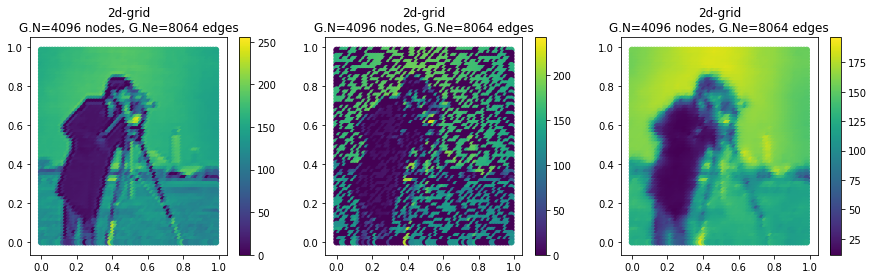

In [64]:
# looks like alpha is too strong here, let's try a new value!
observed_indxs = bernoulli.rvs(0.5, size=G.N)
observed_values = ss * observed_indxs
alpha = 0.5;
M = np.diag(observed_indxs)
A = M + (alpha * G.L)
b = M @ observed_values
x_recon = np.linalg.solve(A, b)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
G.plot_signal(ss, vertex_size=30, ax=axes[0]);
G.plot_signal(observed_values, vertex_size=30, ax=axes[1]);
G.plot_signal(x_recon, vertex_size=30, ax=axes[2]);

In [65]:
observed_indxs = bernoulli.rvs(0.5, size=G.N)
observed_values = ss * observed_indxs
alpha = 0.5;
M = np.diag(observed_indxs)
A = M + (alpha * G.L)
b = M @ observed_values
x_recon = np.linalg.solve(A, b)

In [66]:
def compute_performance(ss, p, alpha, G, N_seeds = 10):
    MSE = 0
    held_out_MSE = 0
    for i in range(N_seeds):
        observed_indxs = bernoulli.rvs(p, size=G.N)
        observed_values = ss * observed_indxs
        M = np.diag(observed_indxs)
        A = M + (alpha * G.L)
        b = M @ observed_values
        x = np.linalg.solve(A, b)
        MSE = MSE +  np.mean(np.power(np.subtract(x, ss), 2))
        
        held_out_vals = x[np.invert(observed_indxs)]
        ss_held_out = ss[np.invert(observed_indxs)]
        held_out_MSE = held_out_MSE + np.mean(np.power(np.subtract(held_out_vals, ss_held_out), 2))
    return MSE/N_seeds, held_out_MSE/N_seeds

In [67]:
N_alpha = 15
N_p = 5
alphas = np.logspace(-3, 1, N_alpha)
ps = np.linspace(0.25, 0.75, N_p)

MSE_mat = np.zeros((N_alpha, N_p))
HO_MSE_mat = np.zeros((N_alpha, N_p))

for i, alpha in enumerate(alphas):
    for j, p in enumerate(ps):
        mse, ho_mse = compute_performance(ss, p, alpha, G)
        MSE_mat[i, j] = mse
        HO_MSE_mat[i, j] = ho_mse

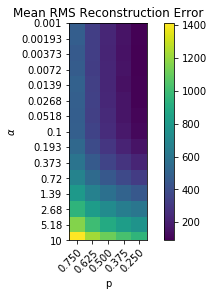

In [68]:
ax = plt.gca()
im = plt.imshow(MSE_mat)
ax.set_xticks(np.arange(len(ps)))
ax.set_yticks(np.arange(len(alphas)))
ax.set_xticklabels([f"{(1-p):.3f}" for p in ps])
plt.colorbar();
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor");
ax.set_xlabel("p");
ax.set_yticklabels([f"{a:.3g}" for a in alphas])
ax.set_ylabel(r'$\alpha$')
plt.title("Mean RMS Reconstruction Error");

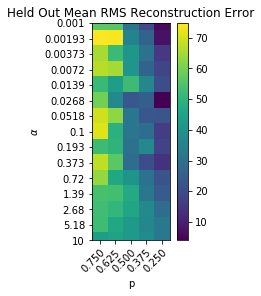

In [69]:
ax = plt.subplot(1, 2, 2)
im = plt.imshow(HO_MSE_mat)
ax.set_xticks(np.arange(len(ps)))
ax.set_yticks(np.arange(len(alphas)))
ax.set_xticklabels([f"{(1-p):.3f}" for p in ps])
plt.colorbar();
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor");
ax.set_xlabel("p");
ax.set_yticklabels([f"{a:.3g}" for a in alphas])
ax.set_ylabel(r'$\alpha$')
plt.title("Held Out Mean RMS Reconstruction Error");

It looks like there is a significant cost by applying this technique for the pixels which are not originally held out. However, $\alpha=0.1$ seems to be a reasonable setting, so let's make some plots for different $p$.

In [70]:
def reconstruction_plot(p):
    observed_indxs = bernoulli.rvs(p, size=G.N)
    observed_values = ss * observed_indxs
    alpha = 0.1;
    M = np.diag(observed_indxs)
    A = M + (alpha * G.L)
    b = M @ observed_values
    x_recon = np.linalg.solve(A, b)
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    G.plot_signal(ss, vertex_size=30, ax=axes[0]);
    G.plot_signal(observed_values, vertex_size=30, ax=axes[1]);
    G.plot_signal(x_recon, vertex_size=30, ax=axes[2]);

In [ ]:
p_s = [0.9, 0.7, 0.5, 0.3, 0.1];
for p in p_s:
    reconstruction_plot(p)

This seems to be working fairly well!